In [17]:
import numpy as np
# Set up matplotlib
import matplotlib.pyplot as plt


from astropy.visualization import time_support
from astropy.timeseries import TimeSeries

%matplotlib notebook 
import matplotlib.image as mpimg

import pandas as pd

from astropy.io import fits
from astropy.utils.data import download_file

import os
import glob
import time
from matplotlib.colors import LogNorm
from IPython import display
from IPython.display import clear_output

import random

%matplotlib inline
plt.rcParams.update({'font.size':15})

from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
from astropy.visualization import SqrtStretch
#from astropy.visualization.mpl_normalize import ImageNormalize

from astropy import units as u
from photutils.aperture import CircularAperture, CircularAnnulus
from photutils.aperture import aperture_photometry
from photutils.aperture import ApertureStats

In [18]:
file = "Sloan Data\\RV Uma\\2022_03_20\\Blue\\Reduced_RV_Uma_Light_Blue_32_secs_001.fits"

In [19]:
threshold_for_DAO = 5.0
FWHM_X = 6

In [20]:
data = fits.getdata(file)

# Find some stats of the main imaage, but removes cosmic rays.
mean, median, std = sigma_clipped_stats(data, sigma=3.0)

In [21]:
# set up the star finding
daofind = DAOStarFinder(fwhm=FWHM_X, threshold=threshold_for_DAO*std, brightest=50, exclude_border=True) 

In [22]:
sources = daofind(data - median)  

for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))

In [23]:
df_star_stats = pd.DataFrame(positions,columns=['xcenters','ycenters'])
#df_star_stats

In [24]:
# set up the circular apertures
aperture = CircularAperture(positions, r=FWHM_X*3)

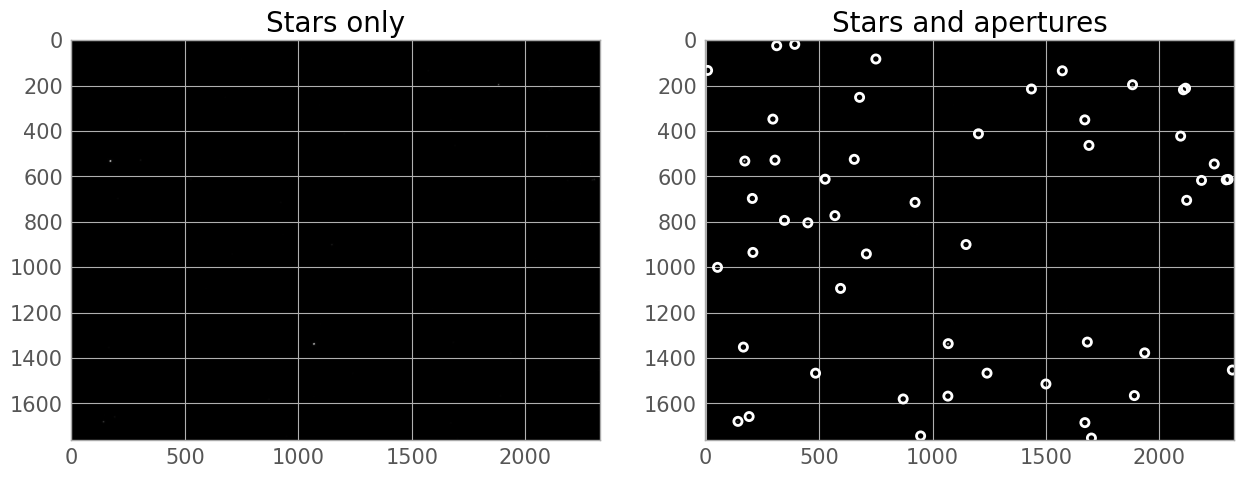

In [25]:
#Plots first one
fig = plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.imshow(data, cmap='gray')

plt.title('Stars only'.format(data), fontsize=20)

plt.subplot(1,2,2)
plt.imshow(data, cmap='gray')

plt.title('Stars and apertures'.format(data), fontsize=20)
ap_patches = aperture.plot(color='white', lw=2,
                           label='Photometry aperture')

In [26]:
# Set up the aperture photometry.
CIRC_stats = ApertureStats(data, aperture)

# Find the total count (sum) within the circular apertures
df_star_stats['Sum of circulr aperture'] = CIRC_stats.sum

# Find the total area of the circular apertures
df_star_stats['Area of circular aperture'] = CIRC_stats.sum_aper_area.value

In [27]:
df_star_stats

,xcenters,ycenters,Sum of circulr aperture,Area of circular aperture
0,173.099168,531.931325,25973.687210,1017.876020
1,1069.172170,1336.526466,25644.602137,1017.876020
2,1881.153972,195.887028,8798.727253,1017.876020
3,142.819301,1678.917231,6451.849742,1017.876020
4,2302.355657,612.935815,6844.386596,1017.876020
5,1147.707062,899.782332,3466.012757,1017.876020
6,2294.011076,614.726011,6832.774694,1017.876020
7,305.924920,527.845587,2620.870166,1017.876020
8,192.075877,1657.679300,2323.599746,1017.876020
9,526.969419,611.914790,1746.415945,1017.876020


In [28]:
def FindStars (filepath):
    data = fits.getdata(filepath)
    
    sources = daofind(data - median)  

    for col in sources.colnames:  
        sources[col].info.format = '%.8g'  # for consistent table output
    positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
    df_star_stats = pd.DataFrame(positions,columns=['xcenters','ycenters'])
    df_star_stats
    
    """
    #Plots each one but takes ages
    fig = plt.figure(figsize=(15,10))

    plt.subplot(1,2,1)
    plt.imshow(data, cmap='gray')

    plt.title('Stars only'.format(data), fontsize=20)

    plt.subplot(1,2,2)
    plt.imshow(data, cmap='gray')

    plt.title('Stars and apertures'.format(data), fontsize=20)
    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    """
    print(i)

In [29]:
image_list = []
n = 0

#blue filter
filepath = "Sloan Data\\RV Uma\\2022_03_20\\Blue\\"


for file in glob.glob(filepath+"Reduced_RV_Uma_Light_Blue*.fits"):
    image_list.append(file)
    n=n+1

In [30]:
#for i in image_list:
    #FindStars(i)